In [10]:
import numpy as np
import pandas as pd
import os
import random
import math
import cv2
import matplotlib.pyplot as plt
import torch
import dlib
from glob import glob
import tensorflow as tf
from tqdm import tqdm
from PIL import Image

In [11]:
X = []
Y = []

for i in tqdm(glob("C:/Users/Dareen/OneDrive/Desktop/graduation/oece/train/Closed_Eyes/*")):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob("C:/Users/Dareen/OneDrive/Desktop/graduation/oece/train/Open_Eyes/*")):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0) 

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:01<00:00, 1605.46it/s]


In [12]:
X = (np.array(X) - np.min(X)) / (np.max(X) - np.min(X))
X = X/255.0
Y = (np.array(Y) - np.min(Y)) / (np.max(Y) - np.min(Y))

In [13]:
X = np.expand_dims(X,-1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [17]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30


67/67 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.9431
Epoch 1: val_loss improved from inf to 0.69967, saving model to bestModel.h5
67/67 [==============================] - 8s 101ms/step - loss: 0.1440 - accuracy: 0.9431 - val_loss: 0.6997 - val_accuracy: 0.4813
Epoch 2/30
 1/67 [..............................] - ETA: 6s - loss: 0.0544 - accuracy: 0.9688

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9809
Epoch 2: val_loss improved from 0.69967 to 0.67806, saving model to bestModel.h5
67/67 [==============================] - 7s 100ms/step - loss: 0.0572 - accuracy: 0.9809 - val_loss: 0.6781 - val_accuracy: 0.9049
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9883
Epoch 3: val_loss did not improve from 0.67806
67/67 [==============================] - 7s 99ms/step - loss: 0.0332 - accuracy: 0.9883 - val_loss: 0.6952 - val_accuracy: 0.5187
Epoch 4/30
67/67 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9851
Epoch 4: val_loss did not improve from 0.67806
67/67 [==============================] - 6s 95ms/step - loss: 0.0452 - accuracy: 0.9851 - val_loss: 1.3817 - val_accuracy: 0.4813
Epoch 5/30
67/67 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9916
Epoch 5: val_loss did not improve from 0.67806
67/67 [===============

In [18]:
model.evaluate(x_test, y_test)

42/42 [==============================] - 1s 26ms/step - loss: 2.7487 - accuracy: 0.6182


[2.7486793994903564, 0.6181818246841431]

In [19]:

model.save('C:/Users/Dareen/OneDrive/Desktop/graduation/openeyeclosedeye.h5')
from keras.models import load_model

# Load the model
best_model = load_model('C:/Users/Dareen/OneDrive/Desktop/graduation/openeyeclosedeye.h5')

# Evaluate the model
best_model.evaluate(x_test, y_test)

42/42 [==============================] - 1s 26ms/step - loss: 2.7487 - accuracy: 0.6182


[2.7486793994903564, 0.6181818246841431]

1/1 [==============================] - 0s 361ms/step


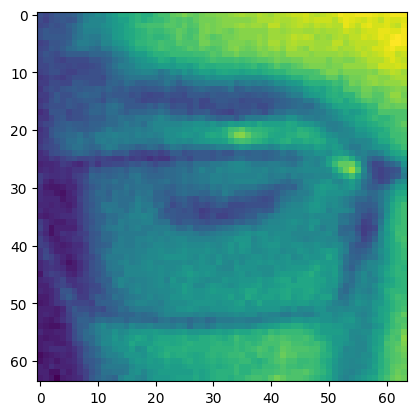

Open
1/1 [==============================] - 0s 27ms/step


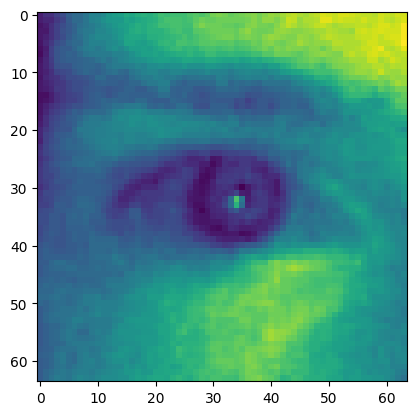

Open
1/1 [==============================] - 0s 28ms/step


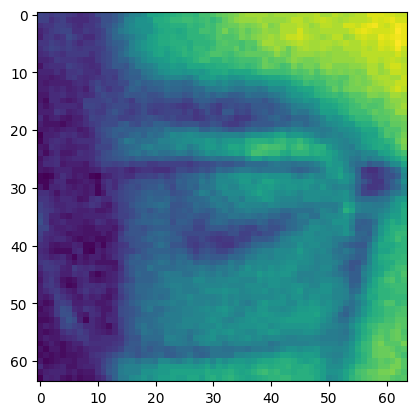

Open
1/1 [==============================] - 0s 29ms/step


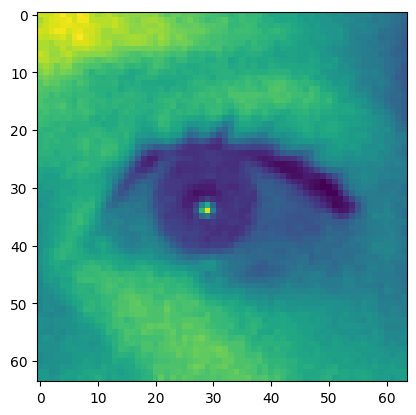

Open
1/1 [==============================] - 0s 29ms/step


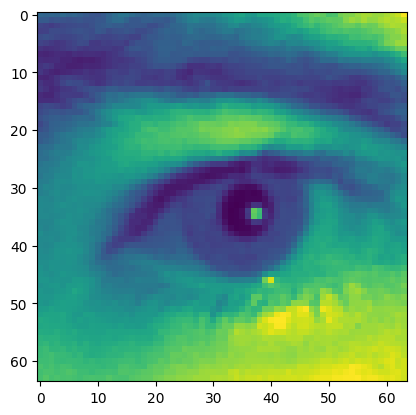

Closed


In [20]:
for i in x_test[0:5]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

42/42 [==============================] - 1s 26ms/step


Text(0.5, 25.722222222222214, 'Actual')

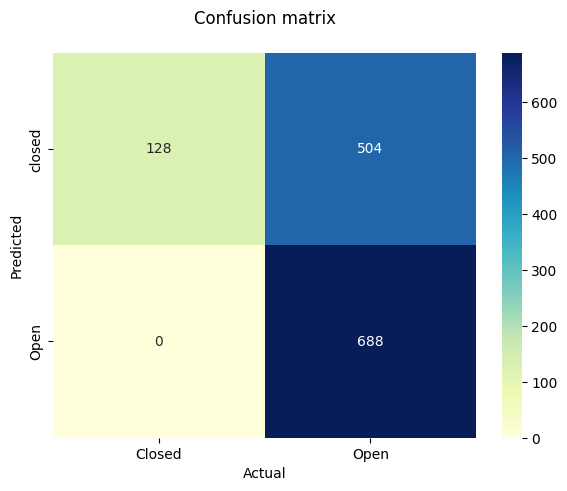

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [22]:
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

42/42 [==============================] - 1s 26ms/step - loss: 2.7487 - accuracy: 0.6182
Accuracy: 0.6181818246841431
